## Airbnb  NYC Case Study 



                                                   By Aditya Kumar & Sonal Hedaoo

#### Problem background:

For the past few months, Airbnb has seen a major decline in revenue. Now that the restrictions have started lifting and people have started to travel more, Airbnb wants to make sure that it is fully prepared for this change.
The different leaders at Airbnb want to understand some important insights based on various attributes in the dataset to increase the revenue

#### Objective:
    
    
To prepare for the next best steps that Airbnb needs to take as a business, we have been asked to analyze a dataset consisting of various Airbnb listings in New York as a data analyst.

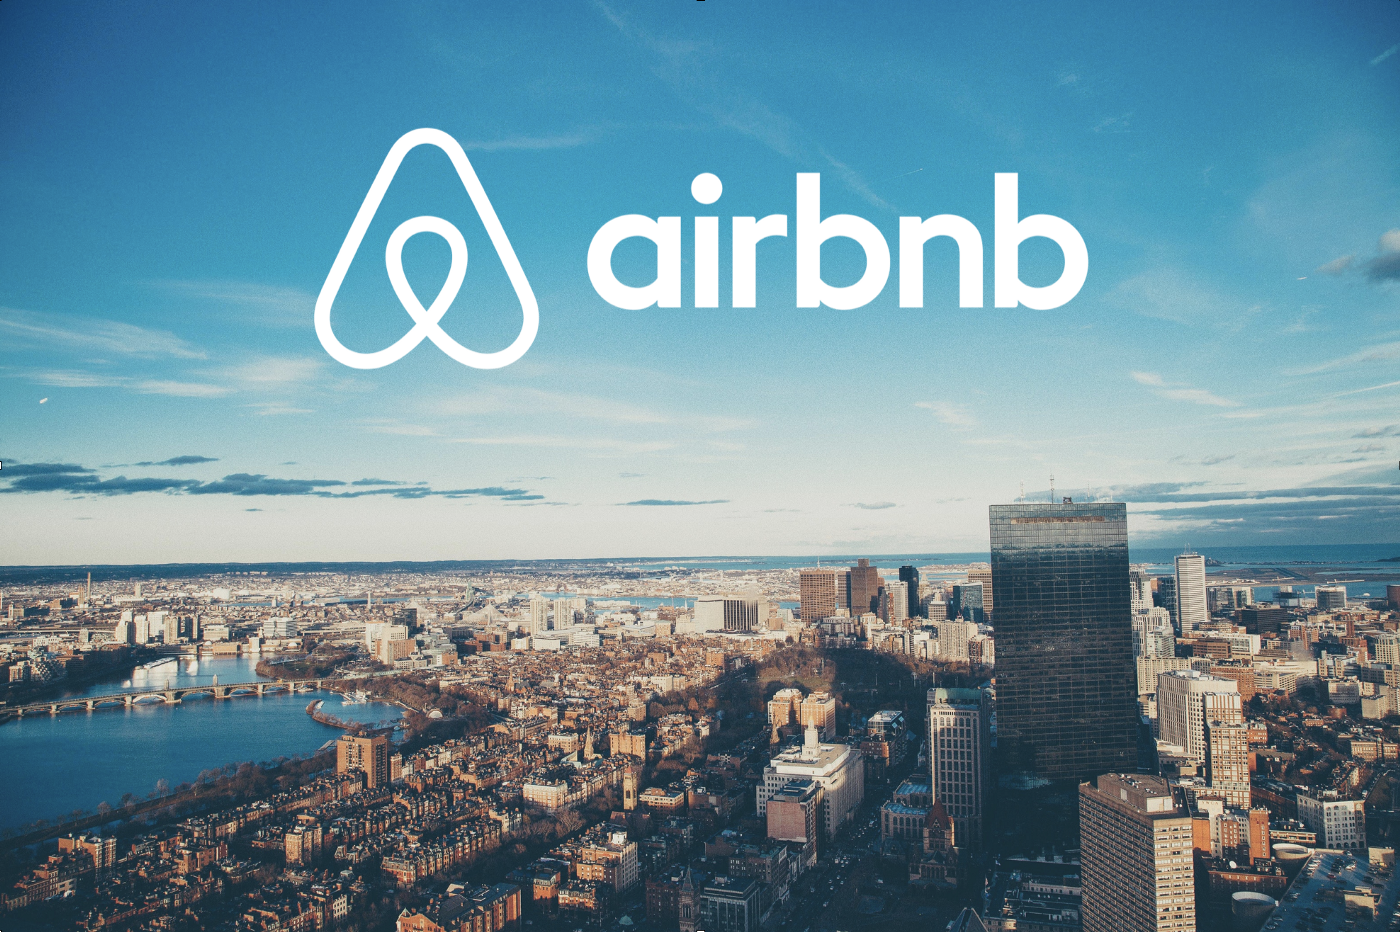

### Dataset

Contains information about different Airbnb listings along with their hosts, locations, prices and other attributes. Below is the column description

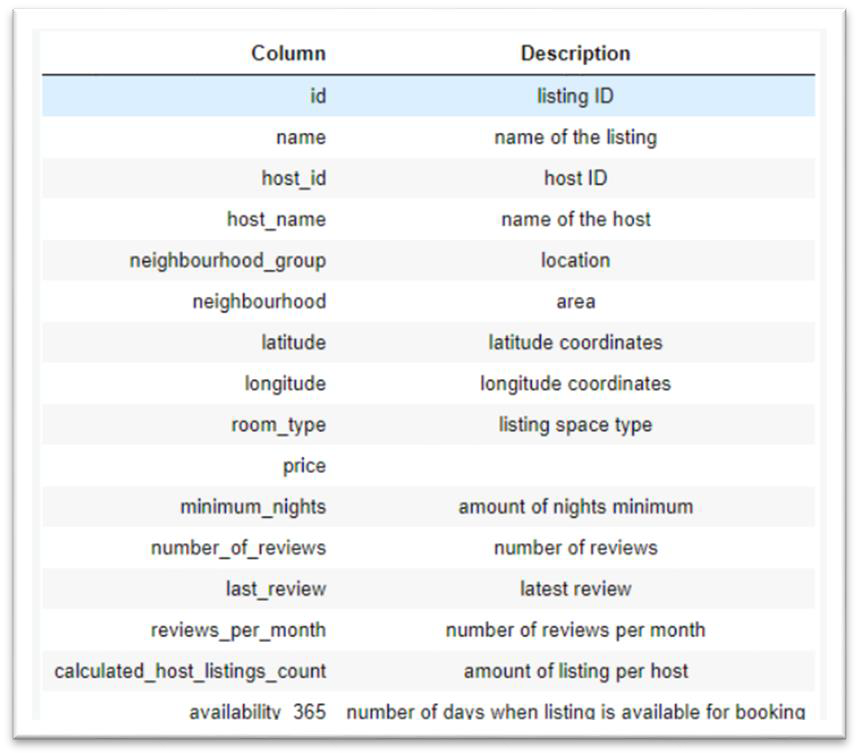

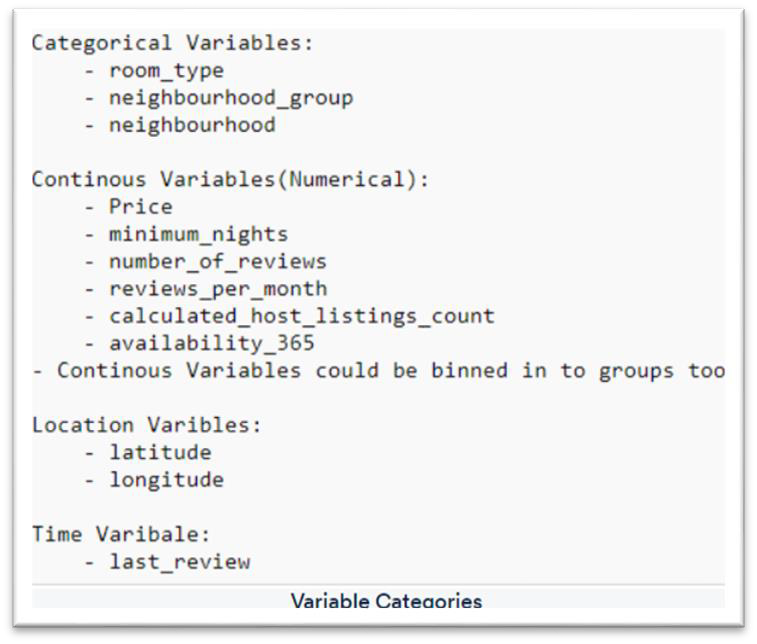

## Data Analysis:


####  Step 1: Imported Appropriate Libraries And Read The Data Into A Data Frame

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("AirBnb.csv")

In [41]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9    19/10/18   
1  Entire home/apt    225               1                 45    21/05/19   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270    05/07/19   
4  Entire home/apt     80              10                  9    19/11/18   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

####  Step 2: Understanding the Data & Normal Routine Checkup

In [42]:
###  Checking the Shape of Dimension

df.shape

(48895, 16)

In [43]:
#### Checking the Column Name 

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [44]:
#checking amount of rows in given dataset to understand the size we are working with
len(df)

48895

In [45]:
#checking type of every column in the dataset
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

After loading the dataset in and from the head of AB_2019_NYC dataset we can see a number of things. These 16 columns provide a very rich amount of information for deep data exploration we can do on this dataset. We do already see some missing values, which will require cleaning and handling of NaN values. Later, we may need to continue with mapping certain values to ones and zeros for predictive analytics.

In [46]:
### checking the column information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [47]:
### checking the dataset summary 
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

### Observations:
1. Dataset contains 48895 rows and 16 columns.

2. three columns are of float type, seven columns of int type and six columns of object type.

3. Average price of rentals in NY is $153, average no. of nights spent is 7 days, and average availability of an Airbnb is 112 days.

4. There are some listings which appear to be free.

5. Few customer(s) are also exists who have rented for almost 3 years.

6.  There are rentals which are available for all times of the year too i.e. 365 days.

7. Outliers are also present in columns: minimum_nights, number_of_reviews, reviews_per_month and calculated_host_listings_count columns.

#### Step:3  Data Quality Checking

In [48]:
df.isnull().sum()  #checking null value count

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In our case, missing data that is observed does not need too much special treatment. Looking into the nature of our dataset we can state further things: columns "name" and "host_name" are irrelevant and insignificant to our data analysis, columns "last_review" and "review_per_month" need very simple handling. To elaborate, "last_review" is date; if there were no reviews for the listing - date simply will not exist. In our case, this column is irrelevant and insignificant therefore appending those values is not needed. For "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 rate of reviews per month. Therefore, let's proceed with removing columns that are not important and handling of missing data.

In [49]:
df.nunique()  # checking number of  unique value in each columns of dataset

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [50]:
## there are 5 neighbourhood_group 221 neighbourhood and 3 room_type

In [51]:
df.duplicated().sum() # checking number of dublicate row in dataset

0

#### Step 4: Data Cleaning

In [52]:
#replacing all NaN values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)

In [53]:
df.host_name.mode()

0    Michael
dtype: object

In [54]:
df.name.mode()

0    Hillside Hotel
dtype: object

In [55]:
df['host_name'].fillna('Michael',inplace=True) ## replacing all NAN value in host name with mode of columns

In [56]:
df['name'].fillna('Hillside Hotel',inplace=True)## replacing all NAN value in  name with mode of columns

In [57]:
df['last_review'].fillna('Unavailable',inplace=True)

### Step 5: Bivariate analysis

<AxesSubplot:>

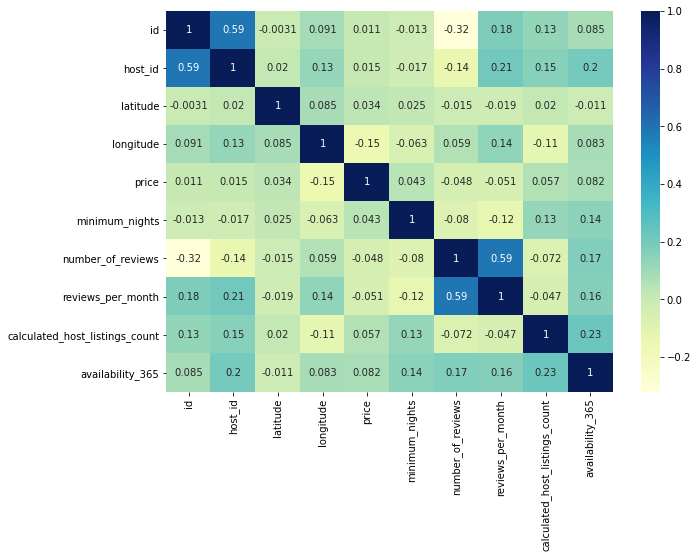

In [70]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap="YlGnBu" , annot=True)

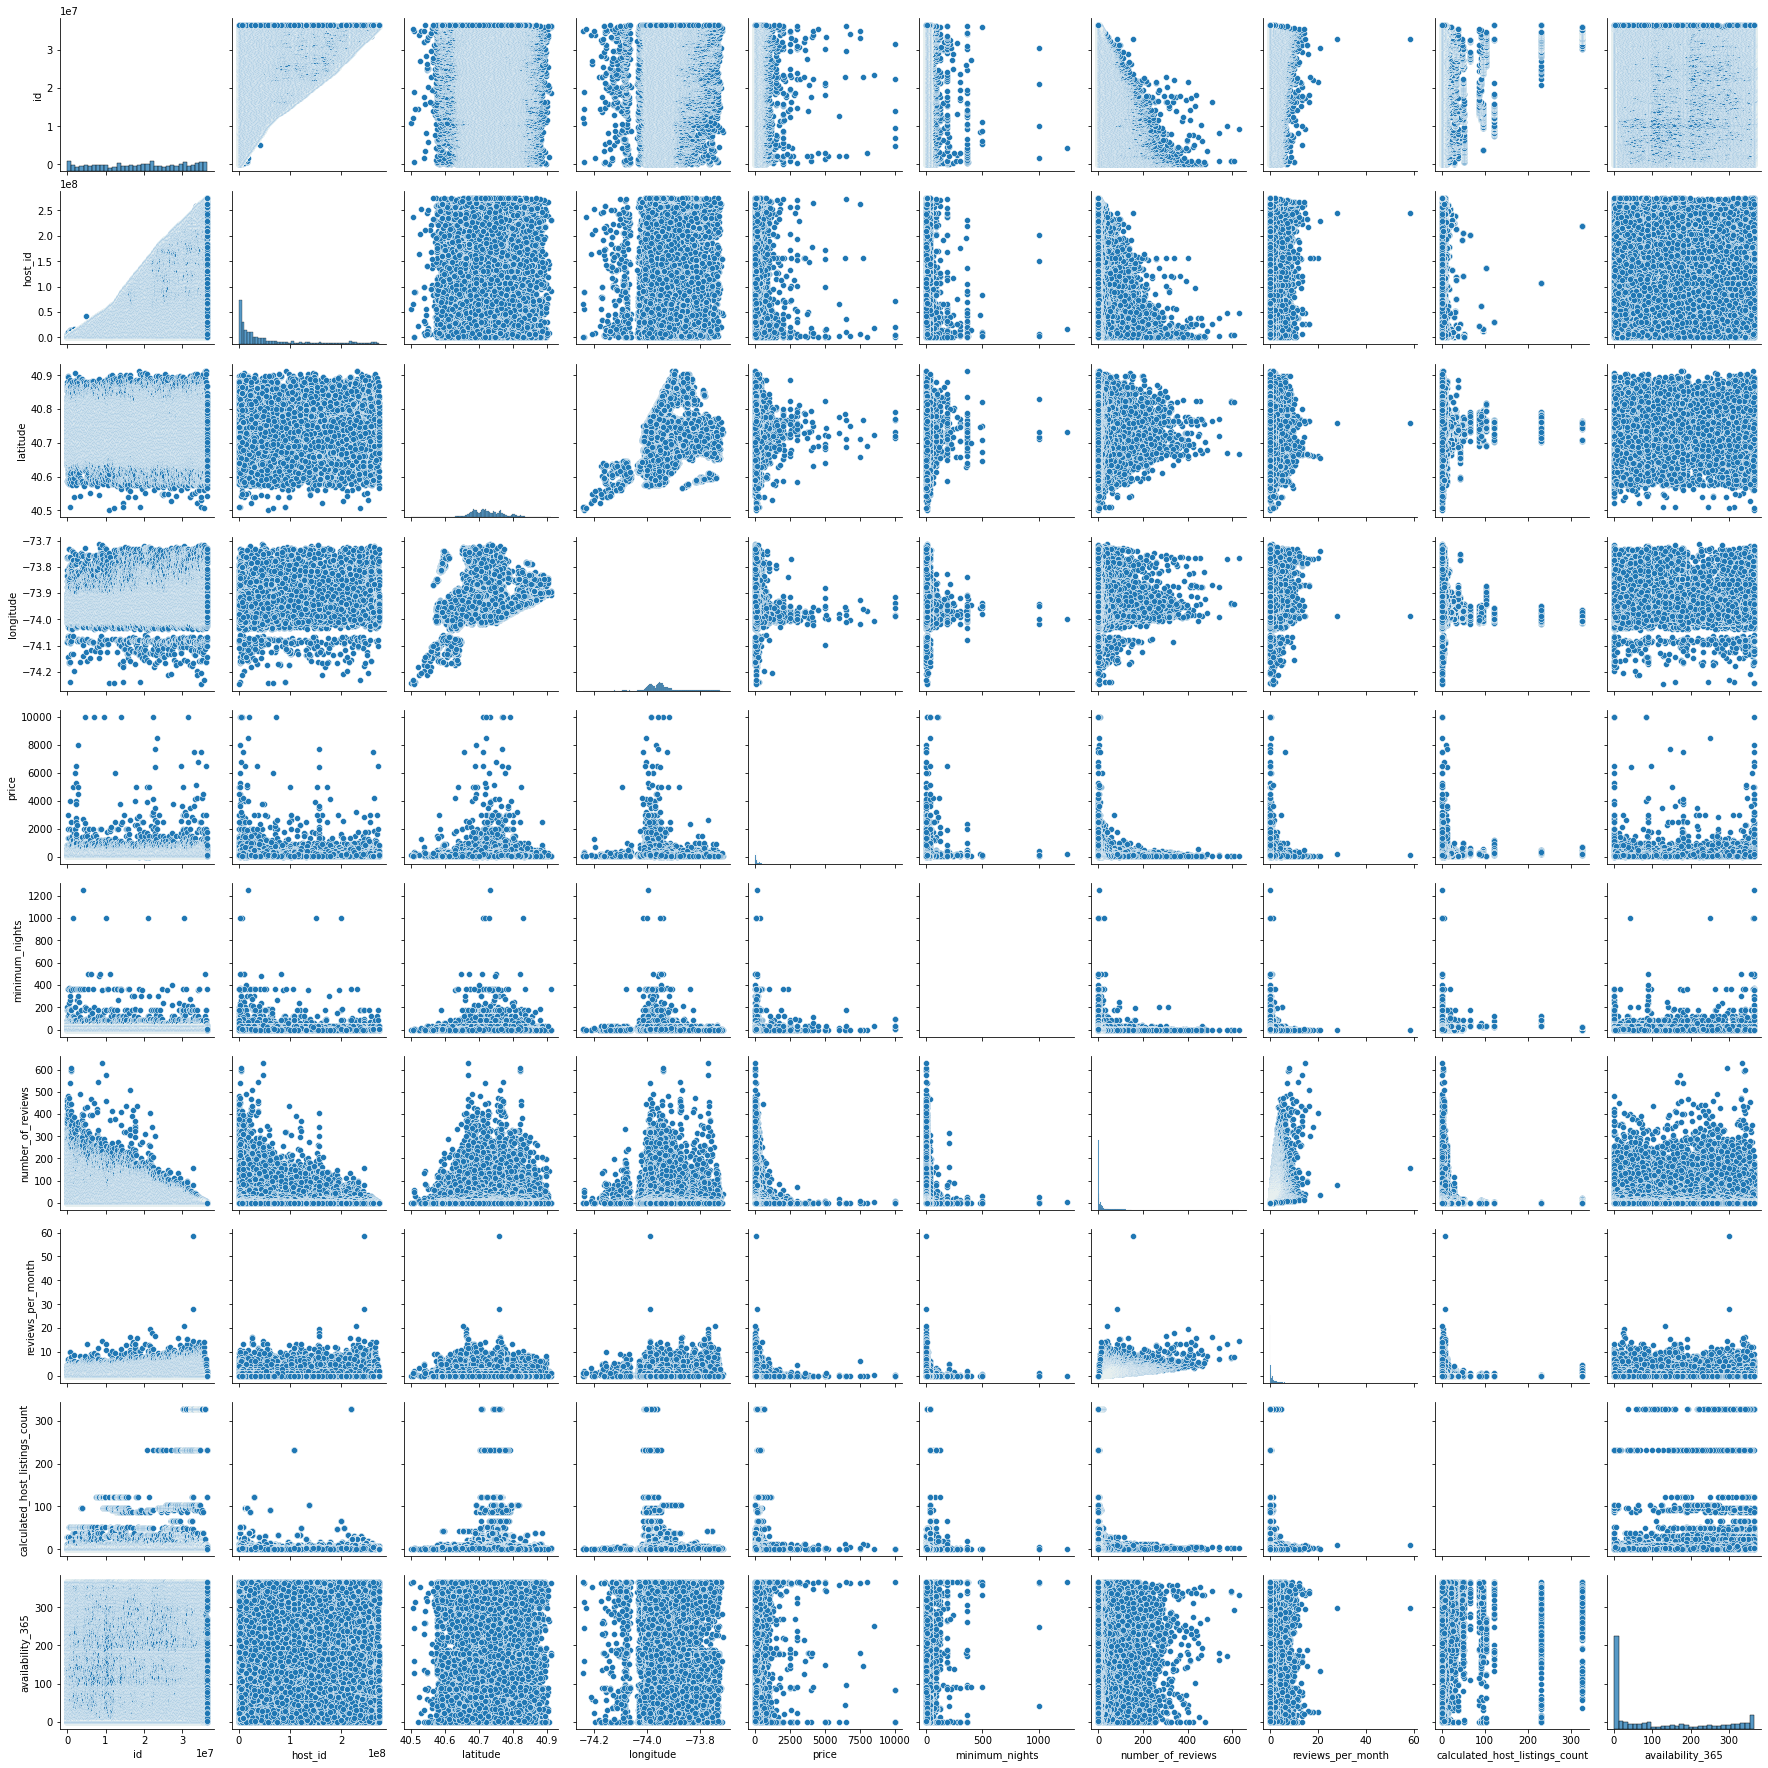

In [73]:
sns.pairplot(df)

There are no significant correlations between columns in the dataset.

### Step 6: Exported cleaned data frame to a CSV file

In [75]:
df.shape

(48895, 16)

In [76]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [78]:
df.to_csv('AirBNB_NYC_2019_DS34.csv')